In [1]:
import sys; sys.path

['/usr/lib/python313.zip',
 '/usr/lib/python3.13',
 '/usr/lib/python3.13/lib-dynload',
 '',
 '/home/lillian/drive/projects/hmc-courses/s8/USDA-Auburn/Exploration/Lillian/venv/lib/python3.13/site-packages']

In [2]:
pushd ../../ML

/home/lillian/drive/projects/hmc-courses/s8/USDA-Auburn/ML


['~/drive/projects/hmc-courses/s8/USDA-Auburn/Exploration/Lillian']

In [3]:
from data_augmentation import Probe, DataAugmentor

In [4]:
from model_eval import *

In [5]:
from transition_matrix import transition_matrix_dict

In [6]:
data_path = os.path.expanduser("~/Downloads/s8/clinic/clean-data/clasp_transitions/")

In [7]:
data = DataImport(data_path, 5)

In [8]:
raw_dfs = data.raw_dfs
all_probes = raw_dfs

In [9]:
probes_as_cls = [Probe().init_df(p) for p in all_probes]

In [10]:
transition_matrix_df = pd.DataFrame(transition_matrix_dict)

In [11]:
DA = DataAugmentor(probes_as_cls, transition_matrix_df)

In [21]:
p=0.1
stdev = 0.001

probe_df = all_probes[0]
# probe = probes_as_cls[0]
probe = Probe().init_df(probe_df)

# new_probe = DA.augment_franken(probe=probe)
# new_probe = DA.augment_concat_self(probe=probe, p=p)
# new_probe = DA.augment_concat_other(probe=probe, p=p)
# new_probe = DA.augment_warp_overall(probe=probe)
# new_probe = DA.augment_warp_by_state(probe=probe, p=p)
new_probe = DA.augment_change_amplitude_overall(probe=probe)
# new_probe = DA.augment_change_amplitude_by_state(probe=probe, p=p)
# new_probe = DA.augment_noise_voltage_overall(probe=probe, stdev=stdev)
# new_probe = DA.augment_noise_voltage_by_state(probe=probe, stdev=stdev, p=p)

new_probe_df = new_probe.build_df().reset_index()

12.46375829412505


In [13]:
df1 = probe_df[1:].reset_index()['labels']
df2 = probe_df[:-1].reset_index()['labels']
where = np.where(df1 != df2)[0]

In [22]:
# doesn't look like the augmentation is actually changing the amplitude? shoulx be 12.4x for this run...

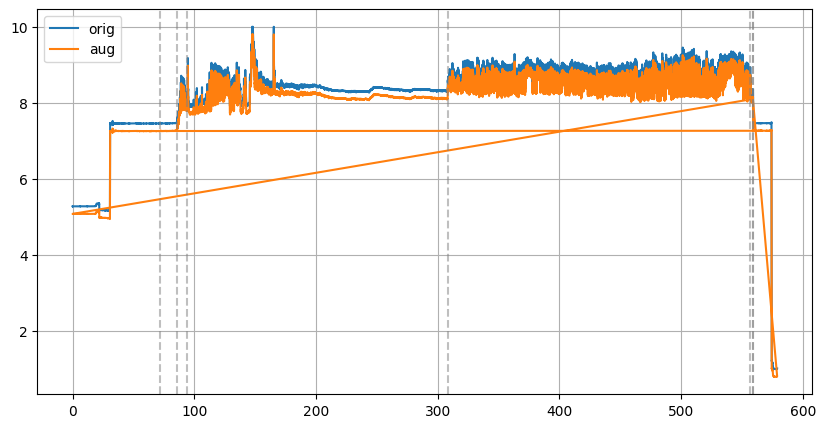

In [23]:
# %matplotlib qt
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.plot(probe_df['time'], probe_df['post_rect'], label='orig')
offset = 0.2
plt.plot(new_probe_df['time'], new_probe_df['post_rect'] - offset, label='aug')
for x in where:
    plt.axvline(probe_df['time'][x], color='gray', alpha=0.5, linestyle='dashed')
plt.legend()
plt.grid()